In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf 
import os 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import pickle
import warnings
warnings.filterwarnings('ignore')


In [3]:
arborio=os.listdir(r"C:\Users\maher\Desktop\Rice_Image_Dataset\Arborio")
basmati=os.listdir(r"C:\Users\maher\Desktop\Rice_Image_Dataset\basmati")
ipsala=os.listdir(r"C:\Users\maher\Desktop\Rice_Image_Dataset\Ipsala")
jasmine=os.listdir(r"C:\Users\maher\Desktop\Rice_Image_Dataset\Jasmine")
karacadag=os.listdir(r"C:\Users\maher\Desktop\Rice_Image_Dataset\Karacadag")

In [4]:
print(f"Number of image present in arborio file : ",len(arborio))
print(f"Number of image present in basmati file : ",len(basmati))
print(f"Number of image present in ipsala file : ",len(ipsala))
print(f"Number of image present in jasmine file : ",len(jasmine))
print(f"Number of image present in karacadag file : ",len(karacadag))

Number of image present in arborio file :  14999
Number of image present in basmati file :  14999
Number of image present in ipsala file :  14999
Number of image present in jasmine file :  14999
Number of image present in karacadag file :  14999


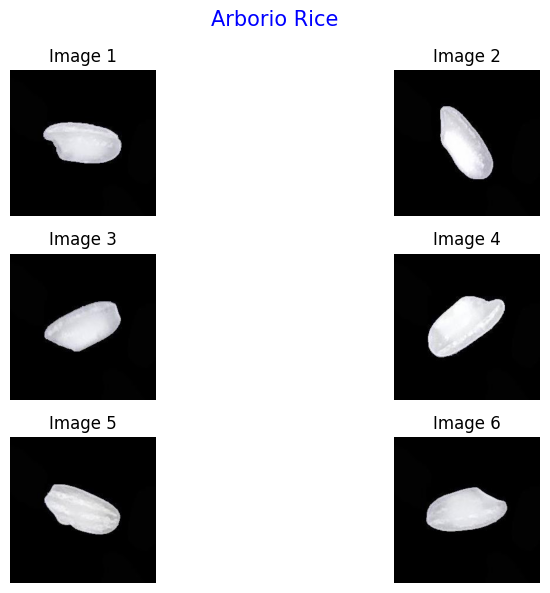

In [5]:
arborio_folder=r"C:\Users\maher\Desktop\Rice_Image_Dataset\Arborio"
plt.figure(figsize=(10,6))
plt.suptitle("Arborio Rice",color="Blue",fontsize=15)
for idx,paths in enumerate(arborio[:6]):
    join_path=os.path.join(arborio_folder,paths)
    img=mpimg.imread(join_path)
    plt.subplot(3,2,idx + 1)
    implot=plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {idx+1}")
plt.tight_layout()
plt.show()

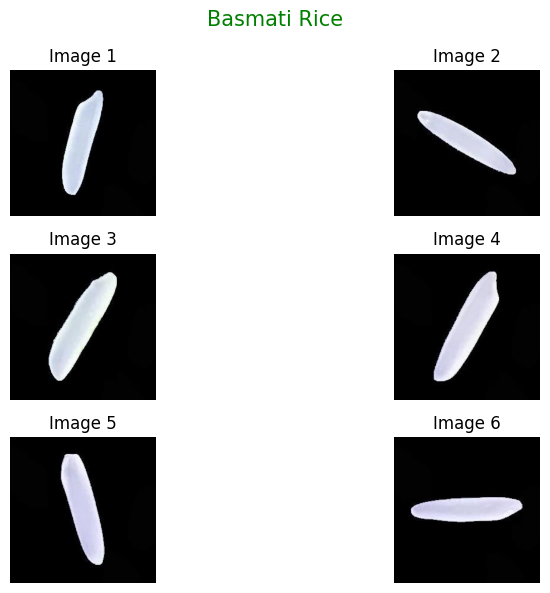

In [6]:
Basmati_folder=r"C:\Users\maher\Desktop\Rice_Image_Dataset\Basmati"
plt.figure(figsize=(10,6))
plt.suptitle("Basmati Rice",color="Green",fontsize=15)
for idx,paths in enumerate(basmati[:6]):
    plt.subplot(3,2,idx + 1)
    join_path=os.path.join(Basmati_folder,paths)
    img=mpimg.imread(join_path)
    plt.imshow(img)
    plt.axis("Off")
    plt.title(f"Image {idx+1}")
plt.tight_layout()
plt.show()

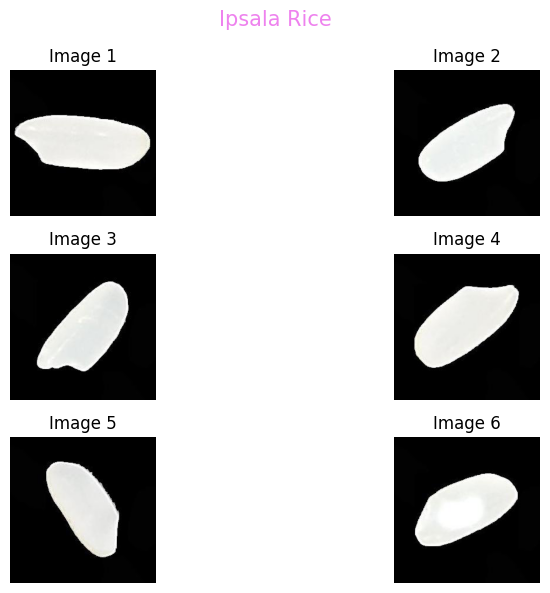

In [7]:
ipsala_folder=r"C:\Users\maher\Desktop\Rice_Image_Dataset\Ipsala"
plt.figure(figsize=(10,6))
plt.suptitle("Ipsala Rice",color="violet",fontsize=15)
for idx,paths in enumerate(ipsala[:6]):
    plt.subplot(3,2,idx + 1)
    join_path=os.path.join(ipsala_folder,paths)
    img=mpimg.imread(join_path)
    plt.imshow(img)
    plt.axis("Off")
    plt.title(f"Image {idx+1}")
plt.tight_layout()
plt.show()

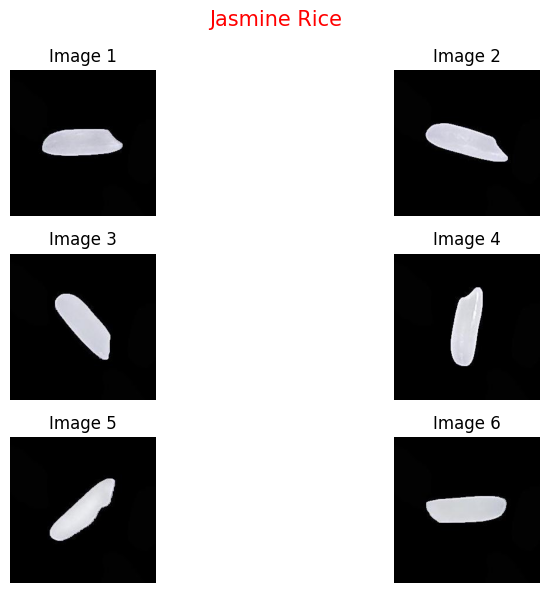

In [8]:
jasmine_folder=r"C:\Users\maher\Desktop\Rice_Image_Dataset\Jasmine"
plt.figure(figsize=(10,6))
plt.suptitle("Jasmine Rice",color="Red",fontsize=15)
for idx,paths in enumerate(jasmine[:6]):
    plt.subplot(3,2,idx + 1)
    join_path=os.path.join(jasmine_folder,paths)
    img=mpimg.imread(join_path)
    plt.imshow(img)
    plt.axis("Off")
    plt.title(f"Image {idx+1}")
plt.tight_layout()
plt.show()

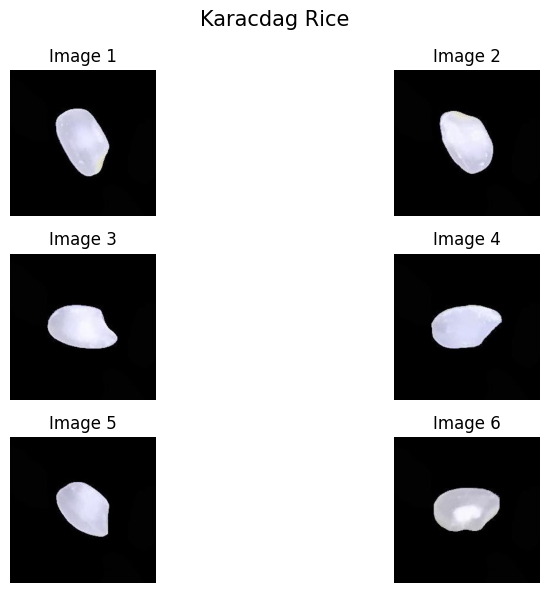

In [9]:
karacadag_folder=r"C:\Users\maher\Desktop\Rice_Image_Dataset\Karacadag"
plt.figure(figsize=(10,6))
plt.suptitle("Karacdag Rice",color="black",fontsize=15)
for idx,paths in enumerate(karacadag[:6]):
    plt.subplot(3,2,idx + 1)
    join_path=os.path.join(karacadag_folder,paths)
    img=mpimg.imread(join_path)
    plt.imshow(img)
    plt.axis("Off")
    plt.title(f"Image {idx+1}")
plt.tight_layout()
plt.show()

In [10]:
def image_preprocess(folder_paths,Rice_name):
    images=[]
    for filess in Rice_name:
        image_path=os.path.join(folder_paths,filess)
        image=Image.open(image_path)
        image=image.resize((128,128))
        image=image.convert("L")
        image=np.array(image)
        images.append(image)
    return images

In [11]:
arborio_folder=r"C:\Users\maher\Desktop\Rice_Image_Dataset\Arborio"
arorio=os.listdir(arborio_folder)
basmati_folder=r"C:\Users\maher\Desktop\Rice_Image_Dataset\Basmati"
basmati=os.listdir(basmati_folder)
ipsala_folder=r"C:\Users\maher\Desktop\Rice_Image_Dataset\Ipsala"
ipsala=os.listdir(ipsala_folder)
jasmine_folder=r"C:\Users\maher\Desktop\Rice_Image_Dataset\Jasmine"
jasmine=os.listdir(jasmine_folder)
karacadag_folder=r"C:\Users\maher\Desktop\Rice_Image_Dataset\Karacadag"
karacadag=os.listdir(karacadag_folder)
data=[]
data.extend(image_preprocess(arborio_folder,arborio))
data.extend(image_preprocess(basmati_folder,basmati))
data.extend(image_preprocess(jasmine_folder,jasmine))
data.extend(image_preprocess(karacadag_folder,karacadag))
data.extend(image_preprocess(ipsala_folder,ipsala))

In [12]:
# 1. Convert to NumPy array
x = np.array(data)

# 2. Create labels
labels = (
    [0] * len(arborio) +
    [1] * len(basmati) +
    [2] * len(jasmine) +
    [3] * len(karacadag) +
    [4] * len(ipsala)
)
y = np.array(labels)


In [13]:
# 3. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)



In [14]:
# 4. Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 128, 128, 1)
x_valid = x_valid.reshape(-1, 128, 128, 1)
x_test  = x_test.reshape(-1, 128, 128, 1)


In [15]:
# 5. One-hot encode labels
num_classes = 5
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid_cat = tf.keras.utils.to_categorical(y_valid, num_classes)
y_test_cat  = tf.keras.utils.to_categorical(y_test, num_classes)

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, validation_data=(x_valid, y_valid_cat), epochs=5, batch_size=32)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 309s 205ms/step - accuracy: 0.9185 - loss: 0.2264 - val_accuracy: 0.9681 - val_loss: 0.0931
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 312s 208ms/step - accuracy: 0.9684 - loss: 0.0944 - val_accuracy: 0.9761 - val_loss: 0.0677
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 319s 212ms/step - accuracy: 0.9799 - loss: 0.0598 - val_accuracy: 0.9833 - val_loss: 0.0493
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 319s 213ms/step - accuracy: 0.9832 - loss: 0.0511 - val_accuracy: 0.9805 - val_loss: 0.0586
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 323s 215ms/step - accuracy: 0.9864 - loss: 0.0387 - val_accuracy: 0.9870 - val_loss: 0.0422


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("Test Accuracy:", test_acc)

469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9881 - loss: 0.0379
Test Accuracy: 0.9867324233055115


In [19]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step


In [20]:
from sklearn.metrics import classification_report

# Convert one-hot to class index if needed
y_true = np.argmax(y_test_cat, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

# Generate classification report
print(classification_report(y_true, y_pred, target_names=['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']))

469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step
              precision    recall  f1-score   support

     Arborio       0.97      0.98      0.98      3000
     Basmati       1.00      0.99      0.99      2999
      Ipsala       0.98      0.99      0.99      3000
     Jasmine       0.98      0.98      0.98      3000
   Karacadag       1.00      1.00      1.00      3000

    accuracy                           0.99     14999
   macro avg       0.99      0.99      0.99     14999
weighted avg       0.99      0.99      0.99     14999



In [21]:
model.save("rice_cnn_model.h5")